<div style="text-align: center; background-color: cream;">
  <h1 style="color: #4B0082, font-family: 'Merriweather', serif;">Cohort Analysis For Assessing Customer Retention in E-Commerce Industry </h1><br>
    <b>By Abdulhamid Abdulhamid</b>
</div>

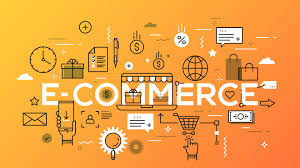

In [1]:
#Import the relevant libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the file
df = pd.read_csv("Dataset_ecommerce (1).csv")
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


# Data Cleaning

Check missing or null values

In [3]:
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

The customer Id has a lot of null values and is not relevant to much important to our analysis, therefore we can drop null values

In [4]:
df = df.dropna()
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [5]:
df.shape

(406829, 8)

Check for duplicates

In [6]:
df[df.duplicated()]

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country


No duplicates

In [7]:
df.dtypes

InvoiceNo       object
InvoiceDate     object
CustomerID     float64
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
Country         object
dtype: object

In [8]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

InvoiceNo              object
InvoiceDate    datetime64[ns]
CustomerID            float64
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
Country                object
dtype: object

In [9]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [10]:
df.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,406829.000000,406829.000000
mean,15287.690570,50.478471,50.477654
std,1713.600303,28.872921,28.573075
min,12346.000000,1.000000,1.000000
25%,13953.000000,25.000000,25.710000
50%,15152.000000,50.000000,50.430000
75%,16791.000000,75.000000,75.170000
max,18287.000000,100.000000,100.000000


# Exploratory data analysis

Lets visualize the top ten countries with the highest quantity of purchase

In [11]:
qty_by_country = df.groupby("Country")['Quantity'].sum()
qty_by_country = qty_by_country.sort_values(ascending = False)
qty_by_country.head(10)

Country
Togo             741223
South Africa     740589
Cote d'Ivoire    740229
Nigeria          739708
Libya            739206
Benin            738133
Zimbabwe         737522
Somalia          736219
Algeria          736181
Sierra Leone     735477
Name: Quantity, dtype: int64

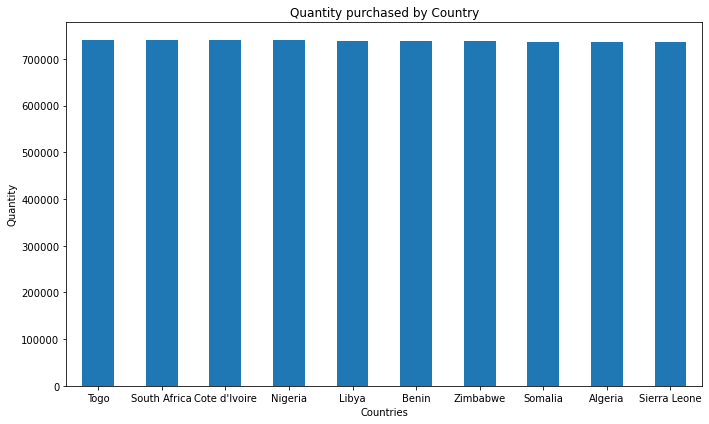

In [12]:
plt.figure(figsize = (10,6))
qty_by_country.head(10).plot(kind = "bar")
plt.title("Quantity purchased by Country")
plt.xlabel("Countries")
plt.ylabel("Quantity")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Buttom 10 countries with the lowest quantity of purchase

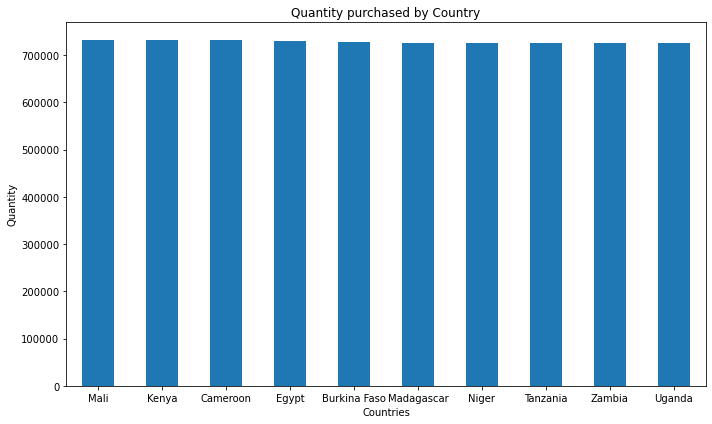

In [13]:
plt.figure(figsize = (10,6))
qty_by_country.tail(10).plot(kind = "bar")
plt.title("Quantity purchased by Country")
plt.xlabel("Countries")
plt.ylabel("Quantity")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Let us explore the Month during which more Quantities were purchased

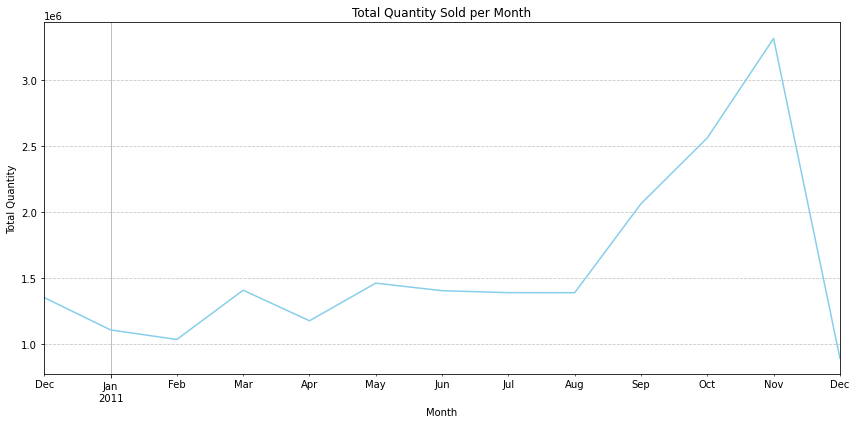

In [42]:
# Extract year and month from 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by 'YearMonth' and sum 'Quantity'
monthly_quantity = df.groupby('YearMonth')['Quantity'].sum()

# Plotting
plt.figure(figsize=(12, 6))
monthly_quantity.plot(kind='line', color='skyblue')
plt.title('Total Quantity Sold per Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle ='--', alpha=0.7)
plt.tight_layout()
plt.grid(True)
plt.show()

# Cohort Analysis

The aim of this section to segment customers into different cohort in order to understand customer's purchasing behavior. This would help the company to strategize and provide insights for retaining customers 

In [15]:
# Lets retrieve the month and year from the InvoiceDate column
def get_month(col):
    return dt(col.year, col.month, 1)

In [16]:
df['InvoiceDate'] = df['InvoiceDate'].apply(get_month)

We will create a column called "cohort_date" which would contain the first day a customer has made his first purchase.

In [17]:
df['cohort_date'] = df.groupby("CustomerID")['InvoiceDate'].transform('min')

In [18]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,YearMonth,cohort_date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-12,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-12,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-12,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-12,2011-08-01


Lets now take the difference between the first and last day a customer made a purchase.

In [19]:
def get_year_and_month(df, col):
    month = df[col].dt.month
    year = df[col].dt.year
    return month, year

In [20]:
first_month, first_year = get_year_and_month(df,'cohort_date')
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort_date, Length: 406829, dtype: int64

In [21]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort_date, Length: 406829, dtype: int64

In [22]:
latest_month, latest_year = get_year_and_month(df,'InvoiceDate')

In [23]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int64

In [24]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int64

We use new term called the cohort Index to determine the periods a customer returned to make a second purchase in months. However if the value is 1, it implies that only made a purchase once

In [25]:
def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff * 12 + month_diff + 1
    return index

In [26]:
df['cohort_index'] = create_cohort_index(first_month, first_year, latest_month, latest_year)

In [27]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,YearMonth,cohort_date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-12,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-12,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-12,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-12,2011-08-01,5


In [28]:
cohort_info = df.groupby(['cohort_date','cohort_index'])["CustomerID"].nunique().reset_index()

In [29]:
cohort_info.rename(columns= {"CustomerID": "Number of customers"}, inplace = True)
cohort_info

,cohort_date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [30]:
cohort_table = cohort_info.pivot(index = "cohort_date", columns = ["cohort_index"], values = "Number of customers")
cohort_table.index = cohort_table.index.strftime("%B %Y")

In [31]:
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_index', ylabel='cohort_date'>

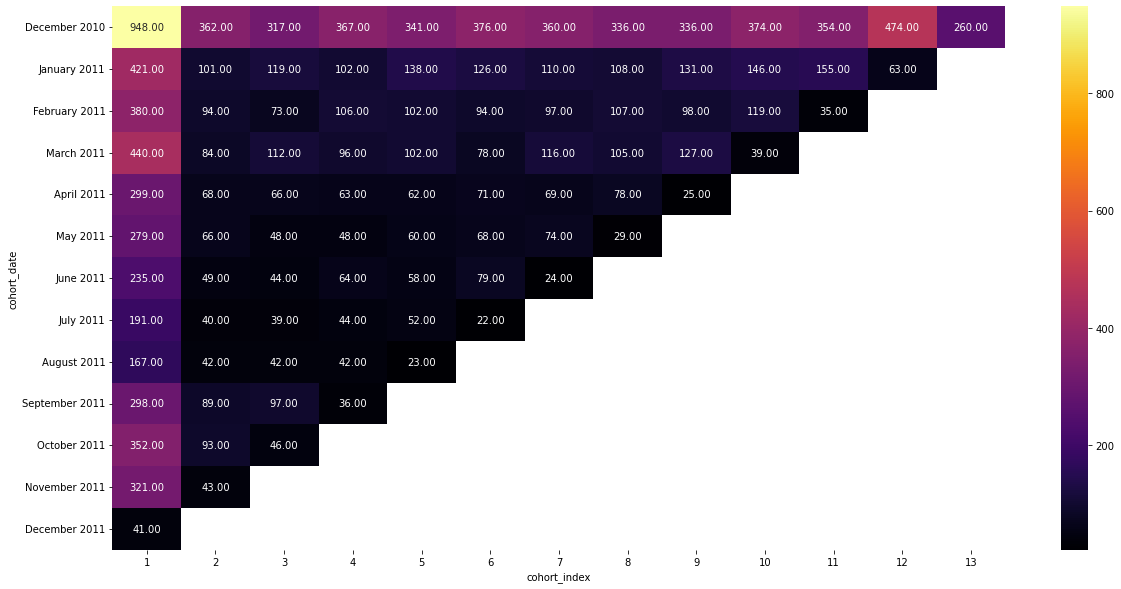

In [32]:
plt.figure(figsize = (20,10))
sns.heatmap(cohort_table, annot = True, fmt = ".2f", cmap = 'inferno')

In [33]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis = 0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_index', ylabel='cohort_date'>

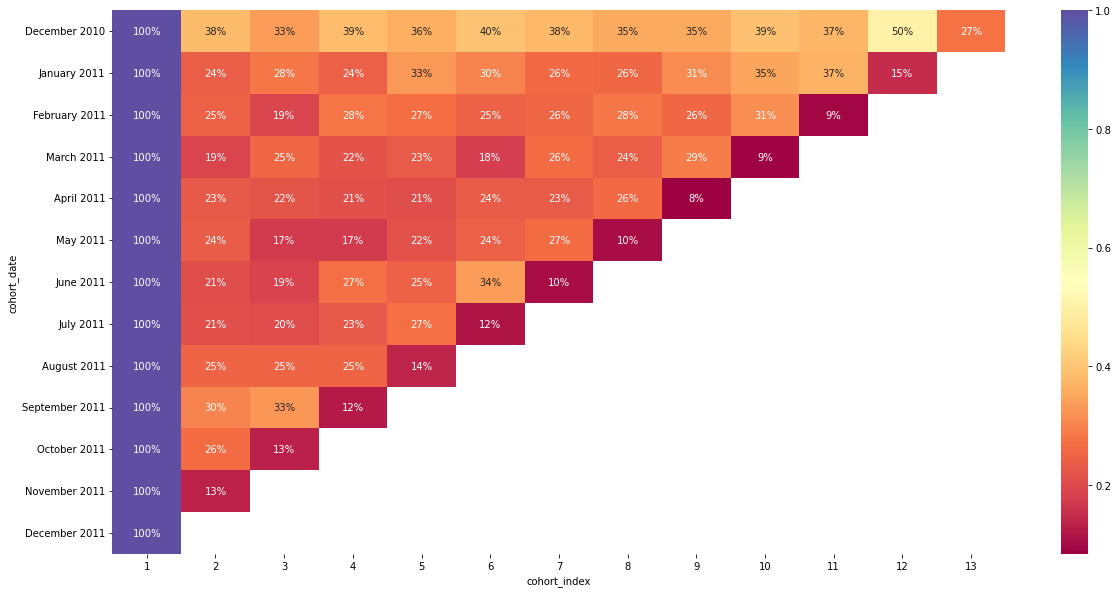

In [34]:
plt.figure(figsize = (20,10))
sns.heatmap(new_cohort_table, annot = True, fmt = ".0%", cmap = 'Spectral')

From the above chart we can observe that in december, 2010, there is high customer retention compared to any other period. From the previous chart we noticed an unprecedented increase between November and December, 2010 in quantity of purchase. This demand for necesarry investigation to understand the reason for the varying churn rate.

In [35]:
quantity_bought = df.groupby(["cohort_date","cohort_index"])['Quantity'].sum().reset_index()

In [36]:
quantity_bought

,cohort_date,cohort_index,Quantity
0,2010-12-01,1,1350834
1,2010-12-01,2,546873
2,2010-12-01,3,462374
3,2010-12-01,4,613244
4,2010-12-01,5,510943
...,...,...,...
86,2011-10-01,2,181888
87,2011-10-01,3,44776
88,2011-11-01,1,574330
89,2011-11-01,2,56021


In [37]:
cohort_table = cohort_info.pivot(index = "cohort_date", columns = ["cohort_index"], values = "Number of customers")
cohort_table.index = cohort_table.index.strftime("%B %Y")

In [38]:
quantity_table = quantity_bought.pivot(index = "cohort_date", columns = ["cohort_index"], values = "Quantity")
quantity_table.index = quantity_table.index.strftime("%B %Y")

In [39]:
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December 2010,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
January 2011,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
February 2011,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
March 2011,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
April 2011,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
May 2011,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
June 2011,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_index', ylabel='cohort_date'>

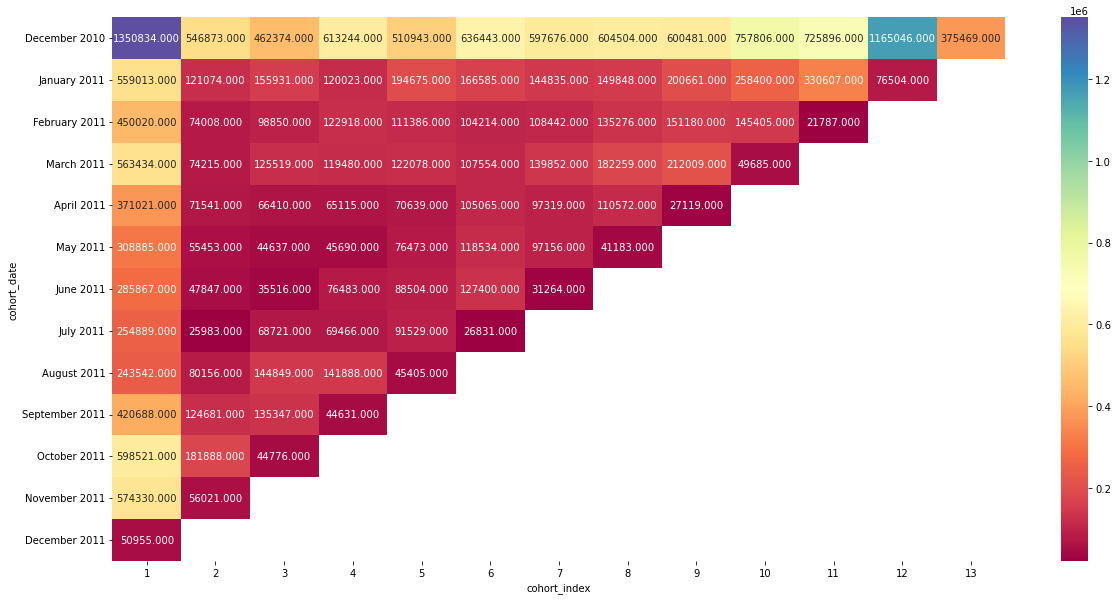

In [40]:
plt.figure(figsize = (20,10))
sns.heatmap(quantity_table, annot = True, fmt = ".3f", cmap = 'Spectral')

# Conclusion

This analysis has uncovered a trend in the monthly sales and countries making more purchase from the e-commerce platform. We also use the cohort analysis to segregate customers inro different cohort to enable the platform owners come up more marketing and customer-retention strategies.

<footer>
  <div style="text-align: center; background-color: lightyellow;">
    <div style="display: inline-block; margin-right: 2em;">
      <a href="mailto:abdulhamidabdulhamid03@gmail.com">
        <img src="https://img.icons8.com/material-outlined/24/000000/new-post.png" alt="Email Icon" style="height: 2em; vertical-align: middle;" />
        abdulhamidabdulhamid03@gmail.com
      </a>
    </div>
    <div style="display: inline-block; margin-right: 2em;">
      <a href="https://www.linkedin.com/in/abdulhamid-abdulhamid-85441b1a4/?lipi=urn%3Ali%3Apage%3Ad_flagship3_feed%3BU3Y%2BLLyLT3W3QUkoNjKtsA%3D%3D">
        <img src="https://img.icons8.com/material-outlined/24/000000/linkedin.png" alt="LinkedIn Icon" style="height: 2em; vertical-align: middle;" />
        LinkedIn
      </a>
    </div>
    <div style="display: inline-block; margin-right: 2em;">
      <a href="https://github.com/elhameedbng">
        <img src="https://img.icons8.com/material-outlined/24/000000/github.png" alt="GitHub Icon" style="height: 2em; vertical-align: middle;" />
        GitHub
      </a>
    </div>
    <hr>
  </div>
</footer>
